# Analyzing Swiggy : Bangalore delivery outlet

Swiggy is a leading online food delivery platform that has transformed the way people access a wide variety of cuisines in India. With its user-friendly interface and extensive network of partner restaurants, Swiggy enables customers to conveniently order food from their favorite local eateries and have it delivered to their doorsteps. With a diverse selection of dishes and seamless delivery services, Swiggy has become a go-to platform for individuals seeking delicious meals from the comfort of their homes or offices. By leveraging technology and a robust logistics network, Swiggy has revolutionized the food delivery experience, contributing to the vibrant food culture in India.

The "Analyze Swiggy" project revolves around examining the Swiggy Bangalore Outlet Details dataset through an ETL and analysis process. The primary objective is to gain insights from the data by extracting information from a CSV file, converting columns to appropriate data types, creating new columns, and handling missing data. These transformed data points are then stored in a new CSV file for further analysis.

Additionally, the project entails analyzing the transformed data using an array of visualizations and metrics. This analysis aims to provide valuable perspectives on aspects such as the distribution of restaurants based on| cost categories, average cost per person across different locations, the number of restaurants in each location, average ratings based on cost categories, rating distributions, average costs for each cuisine, and average ratings for different cuisines. By exploring these dimensions, the project seeks to shed light on the Swiggy dataset and unveil noteworthy findings.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading Dataset

In [2]:
data = pd.read_csv("Swiggy Bangalore Outlet Details.csv")

In [3]:
data.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [4]:
print("Total number of rows:", data.shape[0])
print("Total number of columns:", data.shape[1])

Total number of rows: 118
Total number of columns: 5


In [5]:
data.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [6]:
Duplicates = data.duplicated().sum()
print("Total number of duplicates:", Duplicates)

Total number of duplicates: 0


#### Observation :

No Duplicate Vales are present in our Dataset

In [7]:
data.isnull().sum()

,0
Shop_Name,0
Cuisine,0
Location,0
Rating,0
Cost_for_Two,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


#### Observation:

No Null Values are present in our Dataset

In [9]:
data.nunique()

,0
Shop_Name,115
Cuisine,79
Location,65
Rating,13
Cost_for_Two,30


In [10]:
data.Shop_Name.unique()

array(['Kanti Sweets', 'Mumbai Tiffin', 'Sri Krishna sagar', 'Al Daaz',
       'Beijing Bites', 'Kitchens of Punjab',
       '99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food Court',
       "La Pino'z Pizza", 'Hotel Manu', 'Yumlane Pizza',
       'Ambur Star Briyani', 'Cake Box', 'Meghana Foods', 'Momoz',
       'A2B - Adyar Ananda Bhavan', 'Shawarma Inc',
       'WarmOven Cake & Desserts', 'Sri Lakshmi Dhaba',
       'Falahaar & Kota Kachori', 'Shree Khana Khazana',
       'Just Bake - Cakes & confectioners', 'Maa Di Hatti',
       'Hotel Godavari', 'Rolls On Wheels', 'New Udupi Grand',
       'Swad Punjab da', 'Rice Bowl', 'High N Hungry', 'Burger King',
       'Nandhana Palace', 'Easy Bites', 'Bengali Fun Foods',
       'Madurai Idly Shop', 'Oottupura', 'Taco Bell',
       'Hyderabadi Biryani Hub', 'Biriyani Zone', "Gongura's",
       'Bathinda Junction', 'Leon Grill', "Venu's Donne Biryani",
       'Cakewala', 'Swadista Aahar', 'Cream Stone',
       'Svadu Pure Ghee Sweets', 'Sai Abh

In [11]:
data.Cuisine.unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [12]:
data.Location.unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [13]:
data.Rating.unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [14]:
data.Cost_for_Two.unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [15]:
# Replacing "--" into "zero" rating
data['Rating'] = data.Rating.str.replace('--', '0').astype(float)

In [16]:
data.Rating.unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6, 0. ])

In [17]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [18]:
def data_preprocessing(string):
    try:
        cost = string.split(' ')[1]
        return cost
    except IndexError:
        return None

In [19]:
data['cost_for_two'] = data['cost_for_two'].apply(data_preprocessing)

In [20]:
data.head()

,shop_name,cuisine,location,rating,cost_for_two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   shop_name     118 non-null    object 
 1   cuisine       118 non-null    object 
 2   location      118 non-null    object 
 3   rating        118 non-null    float64
 4   cost_for_two  118 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.7+ KB


In [22]:
data['cost_for_two'] = data['cost_for_two'].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   shop_name     118 non-null    object 
 1   cuisine       118 non-null    object 
 2   location      118 non-null    object 
 3   rating        118 non-null    float64
 4   cost_for_two  118 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [24]:
data.describe()

,rating,cost_for_two
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


#### Observations

The mean rating for Swiggy is 4.061, which indicates a positive rating and is considered good for customers. Average Cost for Two person is Approximately 321 Rupees.

The highest rating recorded is 4.8, while the maximum cost for two people is approximately 800 rupees.

The ratings of restaurants in Bangalore City typically range from 4.0 to 4.8.

In [25]:
data.sort_values(by='rating', ascending=False).head()

,shop_name,cuisine,location,rating,cost_for_two
78,Khichdi Experiment,"Home Food, Healthy Food, Indian","Koramangala, Koramangala",4.8,200
94,Corner House Ice Cream,"Ice Cream, Desserts","7th Block, Koramangala",4.6,250
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150
80,Chinese Bae,"Chinese, Thai","BTM, BTM",4.5,450
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400


#### Observation:

Most Likes food is from Khichdi Experiment which have Home Food, Healthy Food, Indian with an highest rating of 4.8 located at Koramangala

In [26]:
data.sort_values(by='cost_for_two').head()

,shop_name,cuisine,location,rating,cost_for_two
79,Tandoori Merchant,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.2,100
89,99 VARIETY DOSA AND JUICE-Malli mane food court,"Fast Food, Juices, North Indian","Koramangala 1st block, Koramangala",4.1,100
95,NIC Natural Ice Creams,"Ice Cream, Desserts","Koramangla, Koramangala",4.2,120
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
21,Maa Di Hatti,"Chinese, Healthy Food, North Indian","Jakkasandra Extn, Koramangala",4.0,129


#### Observation:

The Shop Tandoori Merchant offers the lowest cost for two, with an average rating of 4.2.

<ipython-input-27-0f874082b595>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'], kde=True, rug=True, color='purple')


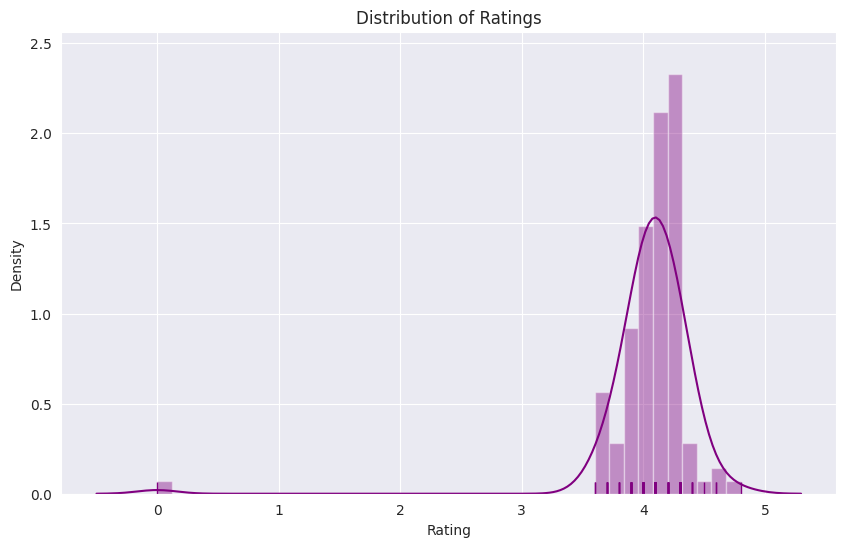

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.distplot(data['rating'], kde=True, rug=True, color='purple')

# Add title and labels
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")

# Show the plot
plt.show()




#### Observations:

Based on the Distribution Plot, it can be inferred that over 50% of the restaurants have a rating higher than 4.1, and the maximum rating observed is 4.8, which is considered a respectable rating.

This data suggests that the majority of these restaurants are performing admirably and have ratings that align with customer satisfaction.

## Area Wise Analysis

In [28]:
data['location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [29]:
data['location'].nunique()

65

In [30]:
locations = []
def dis():
    for i in data.location:
        locations.append(i.split(",")[-1])
    return locations

location = dis()
location

[' Koramangala',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' HSR',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' HSR',
 ' HSR',
 ' Koramangala',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' Jayanagar',
 ' Koramangala',
 ' BTM

In [31]:
area = set(location)
len(area)

4

In [32]:
area

{' BTM', ' HSR', ' Jayanagar', ' Koramangala'}

In [33]:
data['area'] = location

In [34]:
data.head()

,shop_name,cuisine,location,rating,cost_for_two,area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala


In [35]:
BTM = data[data['location'].apply(lambda x: 'BTM' in x)]
BTM

,shop_name,cuisine,location,rating,cost_for_two,area
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200,BTM
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500,BTM
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500,BTM
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200,BTM
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300,BTM
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400,BTM
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250,BTM
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350,BTM
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300,BTM
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268,BTM


In [36]:
print("The Number of Rows in BTM :", BTM.shape[0])
print("The Number of Columns in BTM: ", BTM.shape[1])

The Number of Rows in BTM : 35
The Number of Columns in BTM:  6


In [37]:
HSR = data[data['location'].apply(lambda x: 'HSR' in x)]
HSR

,shop_name,cuisine,location,rating,cost_for_two,area
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350,HSR
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350,HSR
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150,HSR
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600,HSR
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300,HSR
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300,HSR
41,Cakewala,Desserts,"HSR, HSR",4.3,450,HSR
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300,HSR


In [38]:
print("The Number of Rows in HSR :", HSR.shape[0])
print("The Number of Columns in HSR: ", HSR.shape[1])

The Number of Rows in HSR : 18
The Number of Columns in HSR:  6


In [39]:
Jayanagar = data[data['location'].apply(lambda x: 'Jayanagar' in x)]
Jayanagar

,shop_name,cuisine,location,rating,cost_for_two,area
74,CRAVY WINGS - The American Diner,"American, Fast Food","Bannerghatta Road, Jayanagar",4.3,300,Jayanagar


In [40]:
print("The Number of Rows in Jayanagar :", Jayanagar.shape[0])
print("The Number of Columns in Jayanagar: ", Jayanagar.shape[1])

The Number of Rows in Jayanagar : 1
The Number of Columns in Jayanagar:  6


In [41]:
Koramangala = data[data['location'].apply(lambda x: 'Koramangala' in x)]
Koramangala

,shop_name,cuisine,location,rating,cost_for_two,area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350,Koramangala
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150,Koramangala
...,...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500,Koramangala
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219,Koramangala
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


In [42]:
print("The Number of Rows in Koramangala :", Koramangala.shape[0])
print("The Number of Columns in Koramangala: ", Koramangala.shape[1])

The Number of Rows in Koramangala : 64
The Number of Columns in Koramangala:  6


#### Observation:

The given data shows that the restaurants are categorized into only three primary locations.

# Average rating of each cusine

In [43]:
average_ratings = data.groupby('cuisine')['rating'].mean().head(20)

# Print the average ratings for each cuisine
for cuisine, avg_rating in average_ratings.items():
    print(f"Average rating for {cuisine}: {avg_rating:.2f}")

Average rating for American: 4.30
Average rating for American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian: 4.40
Average rating for American, Fast Food: 4.17
Average rating for Andhra, Biryani: 4.03
Average rating for Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian: 4.15
Average rating for Andhra, Chettinad, Chinese, Mughlai, North Indian: 4.00
Average rating for Andhra, South Indian: 4.30
Average rating for Arabian, Beverages, Biryani, Chinese, Desserts, North Indian: 3.90
Average rating for Arabian, Fast Food: 4.10
Average rating for Arabian, Middle Eastern, North Indian, Grill, Seafood, Kerala, Chinese: 4.10
Average rating for Beverages, Cafe, Snacks: 3.80
Average rating for Beverages, Chinese: 4.00
Average rating for Biryani: 3.17
Average rating for Biryani, Andhra, South Indian: 4.00
Average rating for Biryani, Hyderabadi, Andhra, North Indian, South Indian: 4.10
Average rating for Biryani, Juices, Kebabs: 3.60
Average rating for Biryani, Keba

## Koramangala Area

<Axes: xlabel='rating', ylabel='Count'>

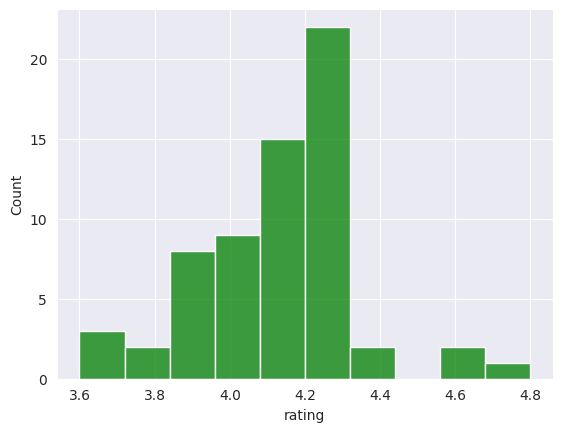

In [44]:
sns.histplot(Koramangala['rating'], bins = 10, color = 'green')

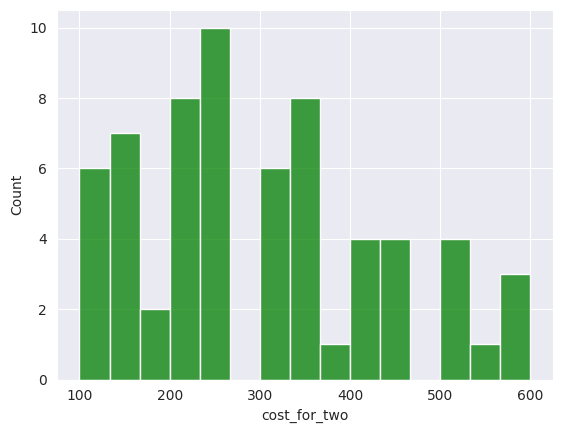

In [45]:
sns.histplot(Koramangala['cost_for_two'], bins = 15, color = 'green');

#### Koramangala

The majority of restaurants have ratings ranging from 4.0 to 4.3, approximately.

The cost for two people ranges from 200 to 350, with the maximum cost going up to 600.

<Axes: xlabel='rating', ylabel='Count'>

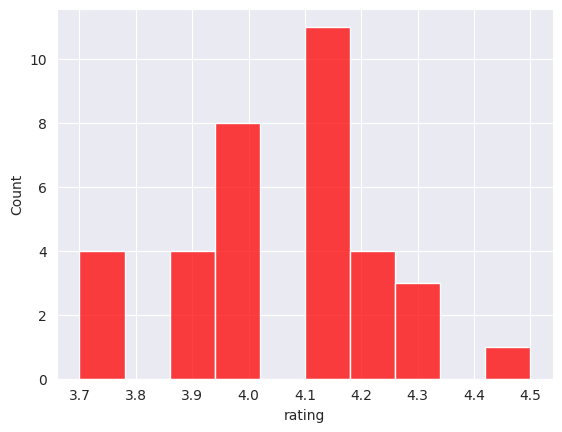

In [46]:
sns.histplot(BTM['rating'], bins = 10, color = 'red')

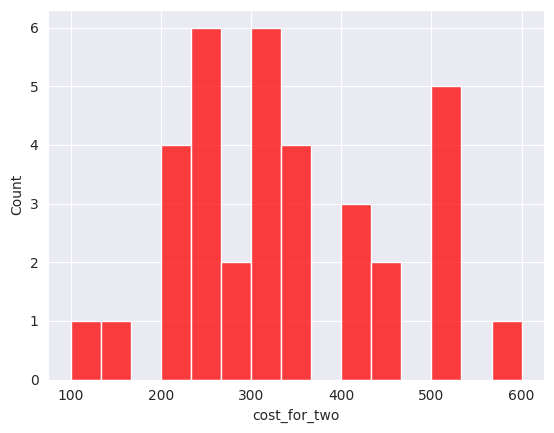

In [47]:
sns.histplot(BTM['cost_for_two'], bins = 15, color = 'red');

#### BTM

The majority of restaurants have ratings ranging from 4.0 to 4.2, approximately.

The cost for two individuals at the restaurants typically falls within the range of 200 to 350, with the maximum cost occasionally reaching up to 600.

<Axes: xlabel='rating', ylabel='Count'>

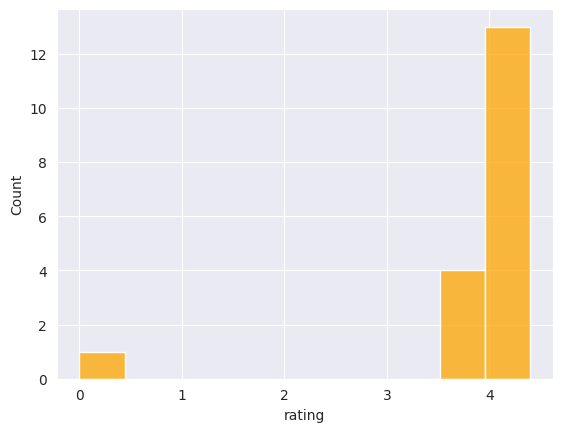

In [48]:
sns.histplot(HSR['rating'], bins = 10, color = 'orange')

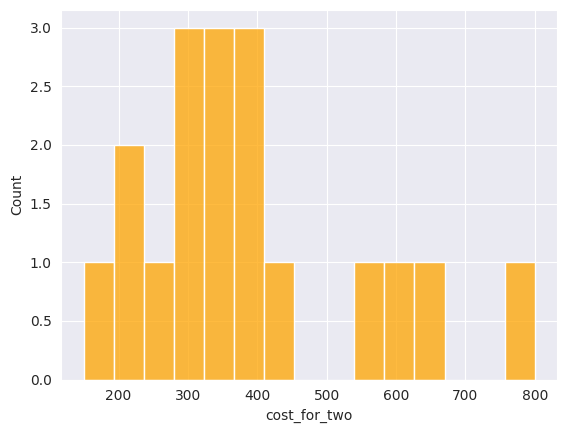

In [49]:
sns.histplot(HSR['cost_for_two'], bins = 15, color = 'orange');

#### HSR

The majority of restaurants in the dataset have a rating of 4.0 or higher, approximately.

The cost for two people typically ranges from 300 to 400, with some restaurants having a maximum cost of 800.

<Axes: xlabel='rating', ylabel='Count'>

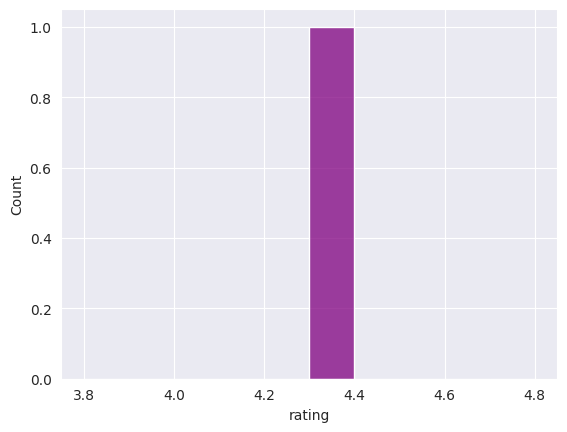

In [50]:
sns.histplot(Jayanagar['rating'], bins = 10, color = 'purple')

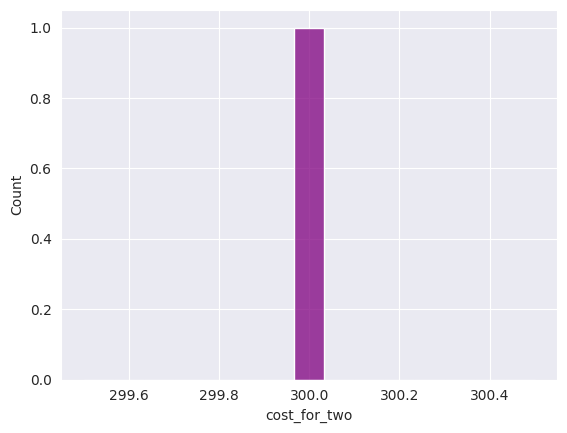

In [51]:
sns.histplot(Jayanagar['cost_for_two'], bins = 15, color = 'purple');

#### Observation:

From the above we can conclude the most Costly Area is "HSR".

## Revenue Area Wise

In [52]:
Revenue = {}
Revenue['BTM'] = BTM['cost_for_two'].sum()
Revenue['HSR'] = HSR['cost_for_two'].sum()
Revenue['Jayanagar'] = Jayanagar['cost_for_two'].sum()
Revenue['Koramangala'] = Koramangala['cost_for_two'].sum()
Rev = Revenue.values()
city=Revenue.keys()
Revenue=pd.DataFrame()
Revenue['City'] = city
Revenue['Revenue'] = Rev
Revenue

,City,Revenue
0,BTM,11518
1,HSR,7000
2,Jayanagar,300
3,Koramangala,19061


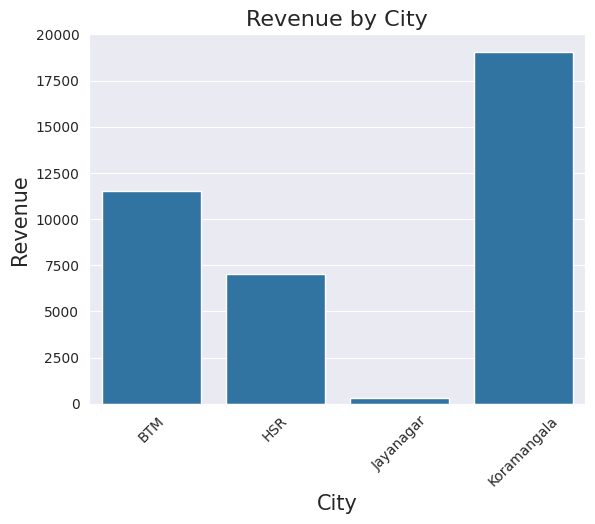

In [53]:
# Create the bar plot
sns.barplot(x=Revenue['City'], y=Revenue['Revenue'], data=Revenue)

# Set labels and title
plt.xlabel('City', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.title("Revenue by City", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

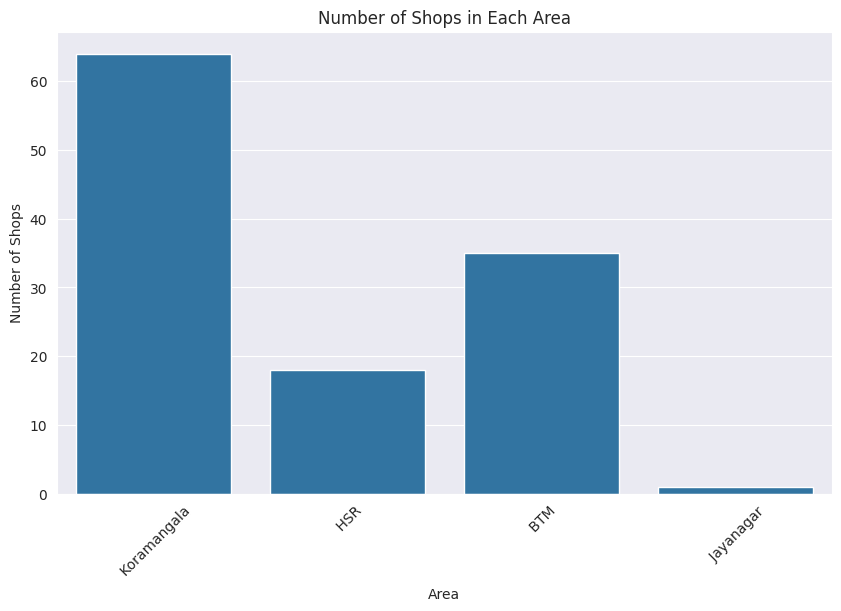

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'area' is the column containing area names
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(data=data, x='area')
plt.title("Number of Shops in Each Area")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.xlabel("Area")
plt.ylabel("Number of Shops")
plt.show()

The highest revenue is generated in the Koramangala and BTM Area.

The majority of shops originate from the Koramangala Area.

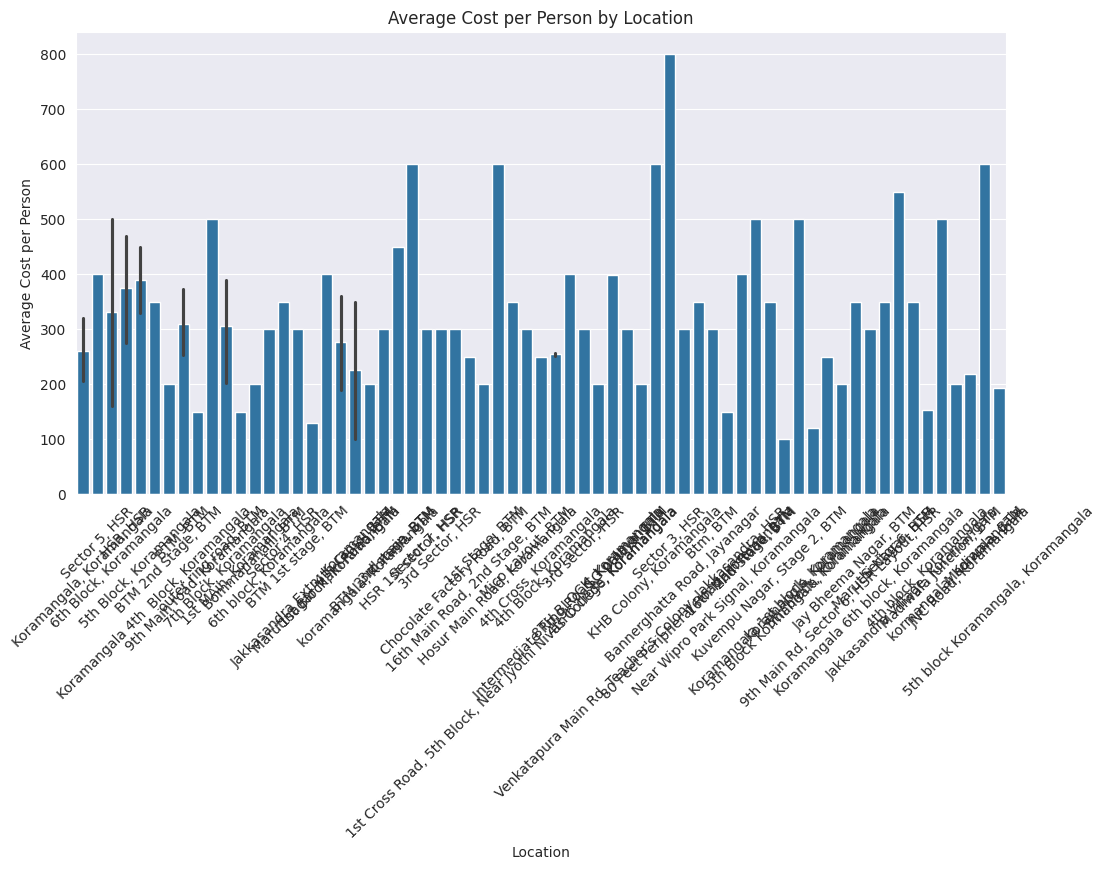

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and you have columns 'location' and 'average_cost_per_person'
plt.figure(figsize=(12, 6))  # Optional: Adjust the figure size
sns.barplot(data=data, x='location', y='cost_for_two')
plt.title("Average Cost per Person by Location")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.xlabel("Location")
plt.ylabel("Average Cost per Person")
plt.show()

## Analyze "Approx Cost for Two People" Vs Rating. Find out the Relationship between Them.**

In [56]:
Highest_Rated_Restaurants = data[data['rating'] >= 4.0].sort_values(by='rating', ascending=False)
Highest_Rated_Restaurants

,shop_name,cuisine,location,rating,cost_for_two,area
78,Khichdi Experiment,"Home Food, Healthy Food, Indian","Koramangala, Koramangala",4.8,200,Koramangala
94,Corner House Ice Cream,"Ice Cream, Desserts","7th Block, Koramangala",4.6,250,Koramangala
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150,Koramangala
80,Chinese Bae,"Chinese, Thai","BTM, BTM",4.5,450,BTM
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
...,...,...,...,...,...,...
21,Maa Di Hatti,"Chinese, Healthy Food, North Indian","Jakkasandra Extn, Koramangala",4.0,129,Koramangala
58,Nanda's,"Andhra, Biryani","HSR, HSR",4.0,400,HSR
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300,HSR
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400,BTM


In [57]:
Highest_Rated_Restaurants = Highest_Rated_Restaurants.loc[:,['shop_name','rating','cost_for_two']]
Highest_Rated_Restaurants

,shop_name,rating,cost_for_two
78,Khichdi Experiment,4.8,200
94,Corner House Ice Cream,4.6,250
82,Natural Ice Cream,4.6,150
80,Chinese Bae,4.5,450
3,Al Daaz,4.4,400
...,...,...,...
21,Maa Di Hatti,4.0,129
58,Nanda's,4.0,400
57,Donne Biriyani House,4.0,300
22,Hotel Godavari,4.0,400


In [58]:
Highest_Rated_Restaurants = Highest_Rated_Restaurants.groupby(['shop_name','rating'])['cost_for_two'].agg('mean')
Highest_Rated_Restaurants = Highest_Rated_Restaurants.reset_index()
Highest_Rated_Restaurants


,shop_name,rating,cost_for_two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


## Analyze the "Affordable/Budgeted" And Highest Rated Restaurnts of bangalore

In [59]:
Affordable_Restaurants = data[(data['cost_for_two'] <= 500) & (data['rating'] >= 4.0)]
Affordable_Restaurants

,shop_name,cuisine,location,rating,cost_for_two,area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
...,...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500,BTM
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200,Koramangala
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


In [60]:
Affordable_Restaurnts = Affordable_Restaurants.groupby(['shop_name','rating'])['cost_for_two'].agg('mean')
Affordable_Restaurnts = Affordable_Restaurnts.reset_index()
Affordable_Restaurnts

,shop_name,rating,cost_for_two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
76,Venu's Donne Biryani,4.3,300.0
77,WarmOven Cake & Desserts,4.1,200.0
78,World of asia,4.0,250.0
79,XO Belgian Waffle,4.3,250.0


In [61]:
Affordable_Restaurnts.sort_values(by=['rating'], ascending=False, inplace=True)
Affordable_Restaurnts

,shop_name,rating,cost_for_two
41,Khichdi Experiment,4.8,200.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0
20,Chinese Bae,4.5,450.0
50,Mumbai Tiffin,4.4,400.0
...,...,...,...
55,New Tasty Cafeteria,4.0,350.0
53,Nandhana Palace,4.0,500.0
52,Nanda's,4.0,400.0
45,Maa Di Hatti,4.0,129.0


## Create a visual representation of the restaurants that are affordable and have the highest ratings.

In [62]:
Afforda_Restaurnts = Affordable_Restaurnts.sort_values(by='cost_for_two', ascending=True)
Afforda_Restaurnts

,shop_name,rating,cost_for_two
72,Tandoori Merchant,4.2,100.0
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
51,NIC Natural Ice Creams,4.2,120.0
68,Sri Krishna sagar,4.1,126.0
45,Maa Di Hatti,4.0,129.0
...,...,...,...
5,Ambur Star Briyani,4.1,500.0
7,BIRYANI CRAFTS,4.1,500.0
53,Nandhana Palace,4.0,500.0
46,Madeena Hotel,4.1,500.0


In [63]:
!pip install plotly


In [64]:
import plotly.express as px

top_pocket_friendly_restaurants = data.sort_values(by=['rating', 'cost_for_two'], ascending=[False, True]).head(10)

fig = px.bar(data_frame=top_pocket_friendly_restaurants,
             x='shop_name',
             y='cost_for_two',
             color='rating',
             labels={'shop_name': "Restaurant Name", 'cost_for_two': "Approx. Cost for Two", 'rating': "Rating"})

fig.update_layout(template='plotly_dark',
                  title='Top 10 restaurants that are affordable and have the highest ratings.')

fig.show()

## Visualize the Immoderate Restaurants.


In [65]:
Immoderate_Restaurnts = Highest_Rated_Restaurants.sort_values(by='cost_for_two', ascending=False)
Immoderate_Restaurnts

,shop_name,rating,cost_for_two
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


In [66]:
### Top 10 Immoderate Restaurants
fig = px.bar(data_frame= Immoderate_Restaurnts,
             x = Immoderate_Restaurnts['shop_name'][0:10],
             y = Immoderate_Restaurnts['cost_for_two'][0:10],
             color=Immoderate_Restaurnts['rating'][0:10],
             labels = {'x':'Restaurnts_Name', 'y':'Approx. Cost for Two', 'color':'Rating'})

fig.update_layout(template='plotly_dark',
                  title="Top 10 Immoderate & Highest Rated Restaurnts With Approx. Cost for Two")

fig.show()

## Cuisine Analysis

In [67]:
data.cuisine

,cuisine
0,Sweets
1,"North Indian, Home Food, Thalis, Combo"
2,"South Indian, North Indian, Fast Food, Beverag..."
3,"American, Arabian, Chinese, Desserts, Fast Foo..."
4,"Chinese, Thai"
...,...
113,"Pan-Asian, Chinese, Asian"
114,"Arabian, Middle Eastern, North Indian, Grill, ..."
115,"North Indian, Chinese, Seafood, Biryani"
116,North Indian


In [68]:
data['cuisine'].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [69]:
Cuisines_category = {}
for i in data['cuisine'].unique():
    Cuisines_list = i.split(',')
    for Cuisine in Cuisines_list:
        Cuisine = Cuisine.lstrip(" ")
        if Cuisine in Cuisines_category:
            Cuisines_category[Cuisine] =  Cuisines_category[Cuisine] + 1
        else:
            Cuisines_category[Cuisine] = 1

print(Cuisines_category)
print()
print('The overall number of cuisine records available for the Swiggy outlets in Bangalore:', len(Cuisines_category))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

The overall number of cuisine records available for the Swiggy outlets in Bangalore: 48


In [70]:
Cuisine = Cuisines_category.keys()
freq = Cuisines_category.values()

In [71]:
Cuisine_Analysis = pd.DataFrame()

In [72]:
Cuisine_Analysis['cuisine'] = Cuisine
Cuisine_Analysis['Frequency'] = freq
Cuisine_Analysis

,cuisine,Frequency
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


In [73]:
Cuisine_Analysis_Sort = Cuisine_Analysis.sort_values(by='Frequency', ascending =False).head(10)
Cuisine_Analysis_Sort


,cuisine,Frequency
11,Chinese,35
1,North Indian,32
5,South Indian,23
21,Biryani,18
6,Fast Food,16
12,Desserts,15
19,Andhra,12
7,Beverages,9
9,American,8
20,Seafood,8


## Visualize the Top 6 Cuisines in the Bangalore City

In [74]:
import plotly.express as px

fig = px.pie(
    data_frame=Cuisine_Analysis_Sort,
    names=Cuisine_Analysis_Sort['cuisine'],
    values=Cuisine_Analysis_Sort['Frequency'],
    hole=0.4,
    labels={'Frequency': 'Percentage'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextorientation='radial'  # Sets the radial orientation for inside labels
)

fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

Certainly! Here's a slightly reduced version of the story:

From the Pie Chart Visualization, we observe that the majority of restaurants in Bangalore serve:

Chinese cuisine, accounting for approximately 19.9%.

North Indian cuisine, representing around 18.2%.

South Indian cuisine, comprising about 13.1%.

These findings indicate the popularity and diversity of these cuisines within the Bangalore restaurant scene. Entrepreneurs and food enthusiasts can leverage this information to understand the preferences of residents and explore the wide range of Chinese, North Indian, and South Indian restaurants available in the city.

## Cuisines - Area Wise Analysis

## Koramangala Area

In [75]:
Koramangala_Cuisine = Koramangala['cuisine']
Koramangala_Cuisine

,cuisine
0,Sweets
2,"South Indian, North Indian, Fast Food, Beverag..."
4,"Chinese, Thai"
5,North Indian
9,"Pizzas, Italian, Mexican"
...,...
112,"Andhra, Biryani"
113,"Pan-Asian, Chinese, Asian"
115,"North Indian, Chinese, Seafood, Biryani"
116,North Indian


In [76]:
Koramangala_Cuisine = {}
for i in Koramangala['cuisine'].unique():
    Cuisines_list = i.split(',')
    for Cuisine in Cuisines_list:
        Cuisine = Cuisine.lstrip(" ")
        if Cuisine in Koramangala_Cuisine:
            Koramangala_Cuisine[Cuisine] =  Koramangala_Cuisine[Cuisine] + 1
        else:
            Koramangala_Cuisine[Cuisine] = 1

print(Koramangala_Cuisine)
print()
print('Total Cuisine Reocrds for the Koramangala Area ', len(Koramangala_Cuisine))

{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

Total Cuisine Reocrds for the Koramangala Area  42


In [77]:
K_cuisine = Koramangala_Cuisine.keys()
K_freq = Koramangala_Cuisine.values()

In [78]:
Koramangala_Cuisine_Analysis = pd.DataFrame()
Koramangala_Cuisine_Analysis['Cuisine'] = K_cuisine
Koramangala_Cuisine_Analysis['Frequency'] = K_freq

In [79]:
Koramangala_Cuisine_Analysis.sort_values(by = 'Frequency', ascending=False)

,Cuisine,Frequency
6,Chinese,15
2,North Indian,14
1,South Indian,11
13,Biryani,10
3,Fast Food,9
11,Desserts,8
17,American,6
4,Beverages,5
8,Pizzas,5
12,Andhra,5


In [80]:
## Top 5 Cuisines in Koramangala
Koramangala_Cuisines_top  = Koramangala_Cuisine_Analysis.sort_values(by='Frequency',ascending=False).head(5)
Koramangala_Cuisines_top

,Cuisine,Frequency
6,Chinese,15
2,North Indian,14
1,South Indian,11
13,Biryani,10
3,Fast Food,9


In [81]:
# Create the pie chart
fig = px.pie(
    data_frame=Koramangala_Cuisines_top,
    names=Koramangala_Cuisines_top['Cuisine'],
    values=Koramangala_Cuisines_top['Frequency'],
    title='Distribution of Cuisines in Koramangala',
    hole=0.4  # Add a hole in the center for a donut-like appearance
)

# Configure text display inside the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Add additional visual enhancements
fig.update_layout(
    showlegend=False,  # Hide the legend
    font=dict(size=12),  # Adjust the font size
    margin=dict(t=50)  # Add top margin for better visibility
)

# Display the interactive plot
fig.show()

Based on the pie chart visualization of the distribution of cuisines in the Koramangala area, the following insights can be derived:

Chinese cuisine has the highest representation, accounting for approximately 25.4% of the total cuisines in Koramangala.

North Indian cuisine follows closely behind with a share of around 23.7%.

South Indian cuisine is the third most popular, comprising approximately 18.6% of the cuisines.

Biriyani holds a significant portion with around 16.5% representation.

Fast food cuisine rounds up the top five with a share of about 15.3%.

These insights provide an overview of the culinary preferences in the Koramangala area, with Chinese and North Indian cuisines being particularly prominent choices. These findings can be valuable for understanding the local food scene and informing decisions related to restaurant offerings or culinary experiences in the area.

## HSR Area

In [82]:
HSR_Cuisine = HSR['cuisine']
HSR_Cuisine

,cuisine
1,"North Indian, Home Food, Thalis, Combo"
3,"American, Arabian, Chinese, Desserts, Fast Foo..."
8,"South Indian, Kerala, Chinese, North Indian"
19,"Indian, Rajasthani"
24,"Chinese, Jain, North Indian, South Indian"
36,"North Indian, Chinese, Biryani"
37,"North Indian, Chinese, Biryani"
39,"Turkish, Portuguese, American"
41,Desserts
57,South Indian


In [83]:
HSR_Cuisine = {}
for i in HSR['cuisine'].unique():
    Cuisines_list = i.split(',')
    for Cuisine in Cuisines_list:
        Cuisine = Cuisine.strip()
        if Cuisine in HSR_Cuisine:
            HSR_Cuisine[Cuisine] += 1
        else:
            HSR_Cuisine[Cuisine] = 1

# Print the cuisine count dictionary
print(HSR_Cuisine)

# Total Cuisine Records for the HSR Area
total_cuisines = len(HSR_Cuisine)
print('Total Cuisine Records for the HSR Area:', total_cuisines)

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}
Total Cuisine Records for the HSR Area: 24


In [84]:
HSR_Cuisines = HSR_Cuisine.keys()
HSR_Freq = HSR_Cuisine.values()

HSR_Cuisines_Analysis = pd.DataFrame()

HSR_Cuisines_Analysis['Cuisines'] = HSR_Cuisines
HSR_Cuisines_Analysis['Frequency'] = HSR_Freq

In [85]:
# Sort the DataFrame by frequency in descending order
HSR_Cuisines_Analysis.sort_values(by='Frequency', ascending=False)

,Cuisines,Frequency
0,North Indian,6
6,Chinese,4
10,South Indian,4
15,Biryani,4
4,American,3
7,Desserts,3
14,Jain,1
22,Snacks,1
21,Kebabs,1
20,Juices,1


In [86]:
HSR_Cuisine_top = HSR_Cuisines_Analysis.sort_values(by='Frequency', ascending=False).head(6)
HSR_Cuisine_top

,Cuisines,Frequency
0,North Indian,6
6,Chinese,4
10,South Indian,4
15,Biryani,4
4,American,3
7,Desserts,3


In [87]:
# Create the pie chart
fig = px.pie(
    data_frame=HSR_Cuisines_Analysis,
    names=HSR_Cuisine_top['Cuisines'],
    values=HSR_Cuisine_top['Frequency'],
    title='Distribution of Cuisines in HSR',
    hole=0.4  # Add a hole in the center for a donut-like appearance
)

# Configure text display inside the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Add additional visual enhancements
fig.update_layout(
    showlegend=False,  # Hide the legend
    font=dict(size=12),  # Adjust the font size
    margin=dict(t=50)  # Add top margin for better visibility
)

# Display the interactive plot
fig.show()

"HSR boasts a diverse culinary scene with North Indian cuisine leading the way, representing 25% of the offerings. Chinese, South Indian, and Biriyani cuisines each hold a share of 16.7%, showcasing the area's appreciation for a variety of flavors. American and Desserts cuisines contribute 12.5% each, reflecting a global influence and a sweet tooth among HSR residents. With such diverse options, HSR promises a vibrant culinary experience for all palates."

## BTM Area

In [88]:
BTM_Cuisine = BTM['cuisine']
BTM_Cuisine

,cuisine
6,"Fast Food, North Indian, Chinese"
7,Italian
10,"Chinese, South Indian, North Indian, Desserts,..."
17,North Indian
20,"Desserts, Bakery"
22,"North Indian, Chinese, Hyderabadi"
25,Indian
27,"Andhra, Biryani, Chinese, Desserts, Fast Food,..."
31,North Indian
33,"Kerala, South Indian"


In [89]:
BTM_Cuisine = {}
for i in BTM['cuisine'].unique():
    Cuisines_list = i.split(',')
    for Cuisine in Cuisines_list:
        Cuisine = Cuisine.lstrip(" ")
        if Cuisine in BTM_Cuisine:
            BTM_Cuisine[Cuisine] =  BTM_Cuisine[Cuisine] + 1
        else:
                BTM_Cuisine[Cuisine] = 1
print(BTM_Cuisine)
print()
print('Total Cuisine Reocrds for the HSR Area ', len(BTM_Cuisine))

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

Total Cuisine Reocrds for the HSR Area  26


In [90]:
BTM_Cuisines = BTM_Cuisine.keys()
BTM_Frequency = BTM_Cuisine.values()
BTM_Cuisine_Analysis = pd.DataFrame()
BTM_Cuisine_Analysis['Cuisine'] = BTM_Cuisines
BTM_Cuisine_Analysis['Freqency'] = BTM_Frequency
BTM_Cuisine_Analysis

,Cuisine,Freqency
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10
5,Desserts,6
6,Kerala,4
7,Andhra,7
8,Beverages,4
9,Mughlai,3


In [91]:
BTM_Cuisine_Analysis_top = BTM_Cuisine_Analysis.sort_values(by='Freqency', ascending=False).head(5)
BTM_Cuisine_Analysis_top

,Cuisine,Freqency
2,Chinese,18
1,North Indian,16
4,South Indian,10
14,Biryani,8
7,Andhra,7


In [92]:
# Create the pie chart
fig = px.pie(
    data_frame=BTM_Cuisine_Analysis,
    names=BTM_Cuisine_Analysis_top['Cuisine'],
    values=BTM_Cuisine_Analysis_top['Freqency'],
    title='Distribution of Cuisines in BTM',
    hole=0.4  # Add a hole in the center for a donut-like appearance
)

# Configure text display inside the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Add additional visual enhancements
fig.update_layout(
    showlegend=False,  # Hide the legend
    font=dict(size=12),  # Adjust the font size
    margin=dict(t=50)  # Add top margin for better visibility
)

# Display the interactive plot
fig.show()

"BTM's culinary scene offers a diverse range of flavors. Chinese cuisine dominates with 30%, followed by North Indian at 27.1%. South Indian holds 16.9%, while Biryani and American cuisines claim 13.6% and 11.9% respectively. From spicy Chinese dishes to aromatic North Indian curries, BTM satisfies cravings for a variety of global flavors."

This condensed version provides a brief overview of the pie chart insights, emphasizing the dominant cuisines in BTM while highlighting the diversity of flavors available in the neighborhood.

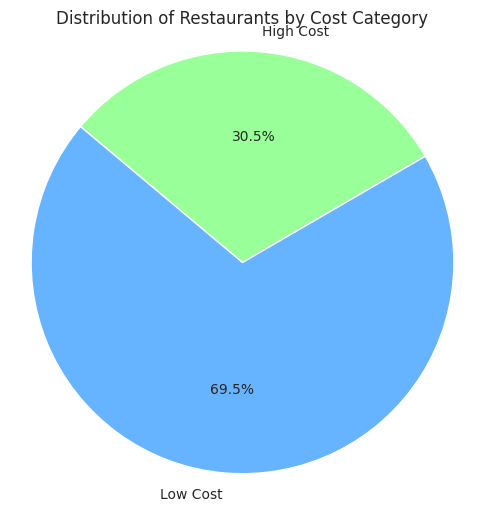

In [93]:
# Define a threshold for categorizing costs
threshold = 354  # Adjust this threshold value as needed

# Categorize costs into 'Low Cost' and 'High Cost' based on the threshold
data['cost_category'] = data['cost_for_two'].apply(lambda x: 'Low Cost' if x <= threshold else 'High Cost')

# Calculate the distribution of restaurants by cost category
cost_counts = data['cost_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cost_counts, labels=cost_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Restaurants by Cost Category')

# Display the pie chart
plt.show()

## Summary

Discovering the restaurant landscape in Bangalore provides fascinating insights into the dining preferences of the city's residents. Here are the key highlights:

Swiggy, a popular food delivery platform, boasts an impressive average rating of 4.061, indicating positive customer satisfaction. Additionally, the average cost for two people is a reasonable 321 rupees.

The highest-rated restaurant has an exceptional rating of 4.8, accompanied by a higher cost for two at 800 rupees. This demonstrates that Bangalore offers options for both fine dining experiences and more affordable culinary delights.

Bangalore's restaurants showcase a range of ratings, spanning from 4.0 to 4.8. The most sought-after establishment, "Khichdi Experiment," shines with a remarkable rating of 4.8. Furthermore, it's worth noting that ice cream holds particular popularity in the vibrant Koramangala area.

On the lower end of the cost spectrum, "Tandoori Merchant" stands out as an affordable option, maintaining an average rating.

In terms of the overall distribution, more than 50% of restaurants in Bangalore boast ratings surpassing 4.1, with the highest possible rating reaching an exceptional 4.8. Notably, the ratings and cost for two differ across various areas. Restaurants in Koramangala and HSR tend to achieve ratings of 4.0 or higher, with costs ranging between 200 and 400 rupees. Meanwhile, in BTM, the majority of establishments score between 4.0 and 4.2, with costs for two typically falling within the range of 200 to 350 rupees.

Analyzing the scatter plot, we discover an intriguing relationship between price and rating. Notably, budget-friendly restaurants tend to receive excellent ratings, while some pricier establishments do not achieve the same level of acclaim. Interestingly, restaurants charging around 600 to 800 rupees for two people tend to receive ratings between 4.0 and 4.1, which pales in comparison to their more affordable counterparts.

The data also reveals the most popular cuisine types in Bangalore. Chinese cuisine tops the charts, accounting for 19.9% of the city's culinary offerings, followed closely by North Indian cuisine at 18.2%. South Indian cuisine captures 13.1% of the market, further emphasizing the diverse culinary experiences available in Bangalore.

These insights showcase the dynamic restaurant scene in Bangalore, providing residents and visitors alike with an array of options to satisfy their gastronomic cravings. Whether one seeks budget-friendly favorites or indulgent fine dining experiences, Bangalore's culinary landscape has something to offer for every palate.